data/aa.csv


Data Read Done!
Training X Size : (107, 14, 6)
Training Y Size : (107, 14, 5)
Test X Size : (84, 14, 6)
Test Y Size : (84, 14, 5)




************ TRAINING START ************ 
Epoch 1/100
4/4 [==============================] - 3s 170ms/step - loss: 0.2273 - mse: 0.0843 - val_loss: 0.1171 - val_mse: 0.0209
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 0.1136 - mse: 0.0195 - val_loss: 0.1219 - val_mse: 0.0242
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1115 - mse: 0.0199 - val_loss: 0.1211 - val_mse: 0.0209
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0960 - mse: 0.0159 - val_loss: 0.1196 - val_mse: 0.0201
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0822 - mse: 0.0119 - val_loss: 0.1083 - val_mse: 0.0171
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0761 - mse: 0.0097 - val_loss: 0.1115 - val_mse: 0.0178
Epoch 7/100
4/4 [============

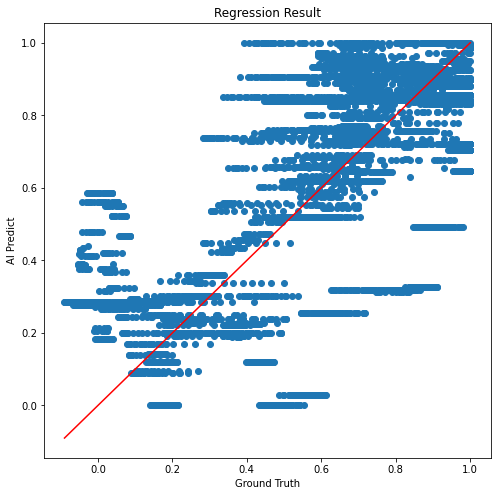

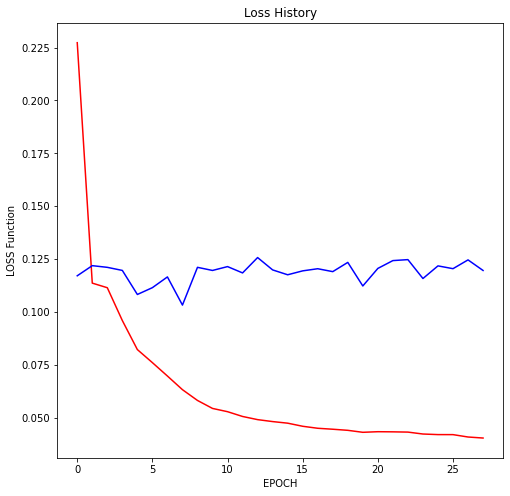

In [1]:
from tensorflow import keras
import data_reader

EPOCHS = 100

dr = data_reader.DataReader(14)

# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(5)
])

# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", loss="mae", metrics=["mse"])

# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(model(dr.test_X), dr.test_Y, history)